In [10]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
# Para saber cual es la proporción de la variable target
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [7]:
# Para saber nulos 
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


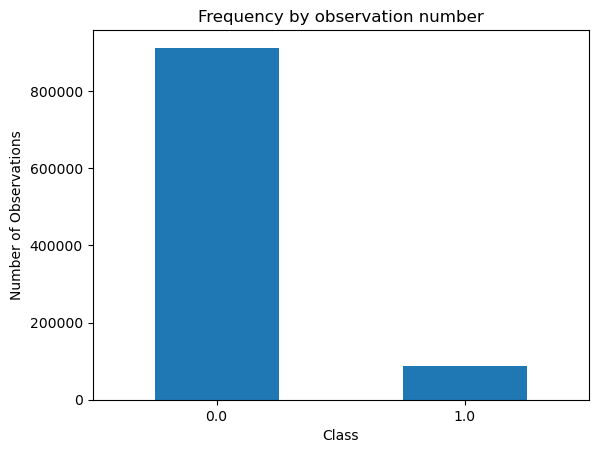

In [11]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (moises) 

In [25]:
# Dataset de sólo no fraude 
df_nf = df.loc[df['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = df.loc[df['fraud'] == 1]
df_f.fraud.value_counts()


0.0    203940
Name: fraud, dtype: int64


1.0    87403
Name: fraud, dtype: int64

In [28]:
definitivo = pd.merge(df_nf2, df_f, how = 'outer')
definitivo.fraud.value_counts()

display(definitivo.sample(10))



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
87437,52.602126,0.444844,0.520382,1.0,0.0,0.0,0.0,0.0
39572,8.615418,0.998121,0.291302,1.0,1.0,0.0,1.0,0.0
61373,27.378599,2.432472,4.759210,1.0,0.0,0.0,0.0,0.0
263545,7.748064,0.219504,4.647260,1.0,0.0,0.0,1.0,1.0
258808,107.447677,1.659811,3.838842,1.0,0.0,0.0,1.0,1.0
281913,234.396760,0.020200,1.479250,1.0,0.0,0.0,1.0,1.0
33410,10.975936,0.340654,1.677605,1.0,0.0,0.0,1.0,0.0
246924,16.496463,32.874524,7.579687,1.0,1.0,0.0,1.0,1.0
232926,100.343614,4.609725,0.137562,1.0,0.0,0.0,1.0,1.0
244666,2.301083,14.187570,38.160868,1.0,0.0,0.0,1.0,1.0
